In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('tfl-daily-cycle-hires.csv')
df.head()

,Day,Number of Bicycle Hires,Unnamed: 2
0,30/07/2010,6897.0,NaN
1,31/07/2010,5564.0,NaN
2,01/08/2010,4303.0,NaN
3,02/08/2010,6642.0,NaN
4,03/08/2010,7966.0,NaN


In [3]:
df.shape

(4081, 3)

In [4]:
df.dtypes

Day                         object
Number of Bicycle Hires    float64
Unnamed: 2                 float64
dtype: object

In [7]:
df.isnull().sum()

Day                           0
Number of Bicycle Hires       0
Unnamed: 2                 4081
dtype: int64

In [8]:
df.columns

Index(['Day', 'Number of Bicycle Hires', 'Unnamed: 2'], dtype='object')

In [9]:
df.drop(columns='Unnamed: 2', inplace=True)

In [11]:
df.head(2)

,Day,Number of Bicycle Hires
0,30/07/2010,6897.0
1,31/07/2010,5564.0


In [15]:
df['Day'] = pd.to_datetime(df['Day'],format='%d/%m/%Y')

In [17]:
df.head(2)

,Day,Number of Bicycle Hires
0,2010-07-30,6897.0
1,2010-07-31,5564.0


In [18]:
df.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
dtype: object

In [20]:
df['Day'] = df['Day'].astype('datetime64')

In [21]:
df.sort_values('Day', inplace=True)

In [24]:
df['Year'] = df['Day'].dt.strftime('%Y')

In [26]:
dfy = df[['Year', 'Number of Bicycle Hires']]
dfy.head()

,Year,Number of Bicycle Hires
0,2010,6897.0
1,2010,5564.0
2,2010,4303.0
3,2010,6642.0
4,2010,7966.0


In [30]:
dfy = dfy.groupby(by='Year').sum().reset_index()
dfy.head()

,Year,Number of Bicycle Hires
0,2010,2180813.0
1,2011,7142449.0
2,2012,9519283.0
3,2013,8045459.0
4,2014,10023897.0


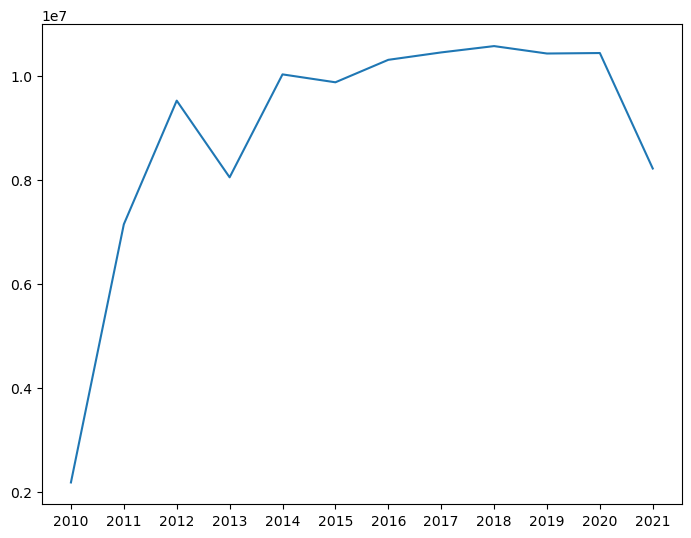

In [35]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.plot(dfy['Year'], dfy['Number of Bicycle Hires'])

plt.show()

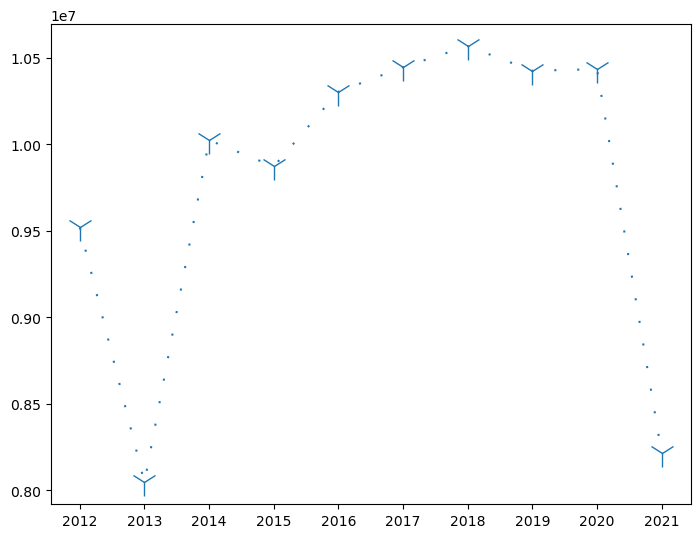

In [48]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.plot('Year', 'Number of Bicycle Hires', data=dfy.tail(10),
        marker='1', markersize=20,
        linestyle=(0, (1,10)))

plt.show()

In [49]:
dfy.tail(10)

,Year,Number of Bicycle Hires
2,2012,9519283.0
3,2013,8045459.0
4,2014,10023897.0
5,2015,9871839.0
6,2016,10303637.0
7,2017,10446044.0
8,2018,10567540.0
9,2019,10424955.0
10,2020,10434167.0
11,2021,8214862.0


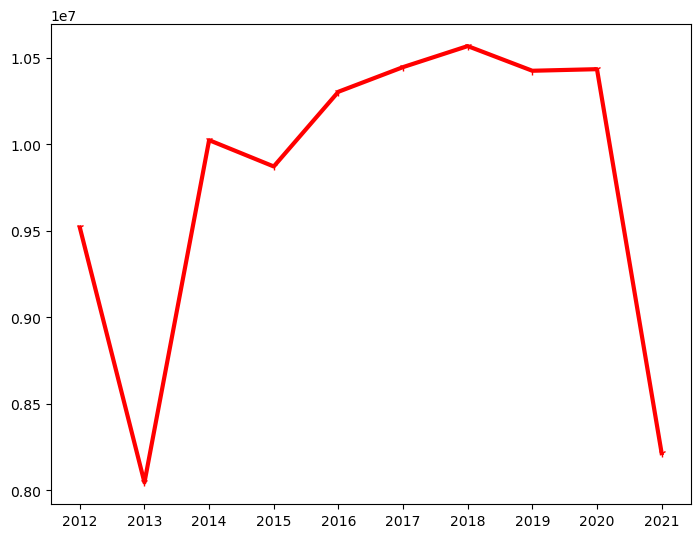

In [56]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.plot(dfy['Year'].tail(10), dfy['Number of Bicycle Hires'].tail(10), color='r', linewidth=3,
        marker='1', markersize=)

plt.show()